# Colorisation d'image (Noir et blanc)

Le but de ce TP est de mettre en place une colorisation automatique de photos en noir et blanc

## Introduction : Formats d'image

De nombreux très nombreux formats de stockage d'image en couleur sont possible sur 3 ou 4 canals je vous laisse regarder ici (doc de CV2) qulques formules de conversion.

https://docs.opencv.org/4.2.0/de/d25/imgproc_color_conversions.html


In [3]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

Récupération d'une image pour tester (appel d'une commande unix en local)

In [8]:
!wget 'https://asa.com/wordpress/wp-content/uploads/2019/06/news-2019-7-22-cuba-above-1024x573.jpg'



7[Files: 0  Bytes: 0  [0 B/s] Re]87[https://asa.com/wordpress/wp-c]87news-2019-7-22-cuba-  58% [================>             ]   32.00K    --.-KB/s87news-2019-7-22-cuba- 100% [=============================>]   54.28K  149.57KB/s87[Files: 1  Bytes: 54.28K [60.31]8

cv2 (open-cv) est une bibliothèque très puissante mais attention les images sont en format GRB par défaut !

(573, 1024, 3)
(573, 1024)


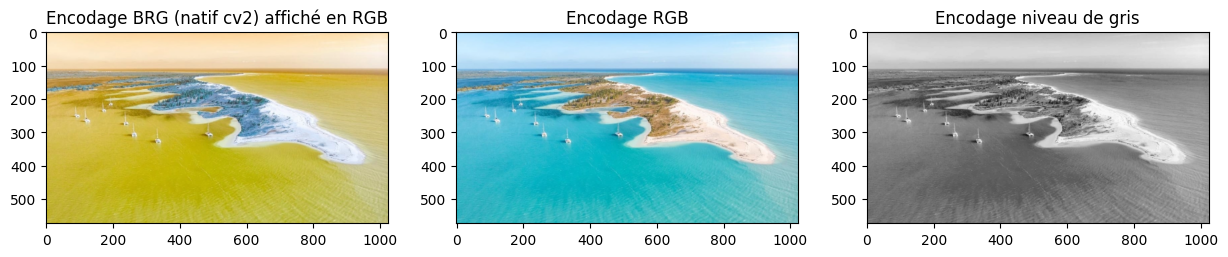

In [11]:
image = cv2.imread('news-2019-7-22-cuba-above-1024x573.jpg')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
print(image.shape)
print(image_gray.shape)
fig=plt.figure(figsize=(15, 8))
fig.add_subplot(1,3, 1)
plt.title('Encodage BRG (natif cv2) affiché en RGB')
plt.imshow(image)
fig.add_subplot(1,3, 2)
plt.title('Encodage RGB')
plt.imshow(image_rgb)
fig.add_subplot(1,3, 3)
plt.title('Encodage niveau de gris')
plt.imshow(image_gray,cmap='gray')

## Format Lab (Light, Green-to-Red, Blue-to-Yellow) (0:255,0:255,0:255)

la couche L (Ligthness) donne la luminosité de l'image, a et b sont des composantes de chrominance (la couleur).
a de vert à rouge et b de bleu à jaune.

Voici un exemple de séparation des couleurs. Pour pouvoir afficher avec les bonnes couleur les caneaux sont isolés et reconvertis en RGB pour les voir dans les bonnes teintes.

(573, 1024, 3)


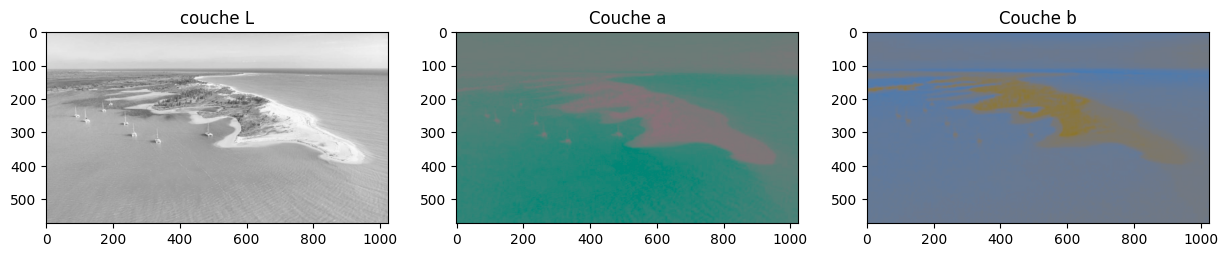

In [13]:
image_Lab = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
print(image_Lab.shape)
fig=plt.figure(figsize=(15, 8))
## Affichage L (on repasse en RGB noté les valeur des couches a et b à 128)
fig.add_subplot(1,3, 1)
plt.title('couche L')
image_L = image_Lab.copy()
image_L[:,:,1:]=128
image_L = cv2.cvtColor(image_L, cv2.COLOR_LAB2RGB)
plt.imshow(image_L)
## Affichage a (on repasse en RGB noté les valeurs L et b à 128)
fig.add_subplot(1,3, 2)
plt.title('Couche a')
image_a = image_Lab.copy()
image_a[:,:,0]=128
image_a[:,:,2]=128
image_a = cv2.cvtColor(image_a, cv2.COLOR_LAB2RGB)
plt.imshow(image_a)
## Affichage a (on repasse en RGB noté les valeurs L et a à 128)
fig.add_subplot(1,3, 3)
plt.title('Couche b')
image_b = image_Lab.copy()
image_b[:,:,0]=128
image_b[:,:,1]=128
image_b = cv2.cvtColor(image_b, cv2.COLOR_LAB2RGB)
plt.imshow(image_b)

## Dataset 

Un dataset quelconque de photos en couleur permet de construire un modèle. Poue cela il "suffit de passer les image en Noir et Blanc (ou luminescence) pour avoir l'entrée du modèle et l'attendu ici les 2 chrominances



## Mise en place du jeux de donnée
Supposons que Img soit un tableau qui contienne les images (Img[0], Img[1] ...)

Alors on peut calculer X et Y avec le canal L des images dans X et les canneaux a et b dans Y 
Ici en plus on renormalise les variable (entre 0 et 1 pour X et -1 et 1 pour Y)

### Code virtuel du calcul de X et Y 

In [5]:
X=[]
Y=[]
for i in range(0,Img.shape[0]):
    im=Img[i]
    im=cv2.cvtColor(im, cv2.COLOR_RGB2LAB)
    X.append(np.float32(im[:,:,0:1])/255) 
    Y.append(np.float32(im[:,:,1:])/128-1)
X=np.array(X)
Y=np.array(Y)

In [6]:
X.shape

(50000, 32, 32, 1)

## Principe : Encoder - Décoder 

Partie encoder : extraie les caractéristiques des images encoder identique pour de la classification d'image

Partie decoder : reconstruit les couches de couleur à partir des caractéristiques

![](https://xiangyutang2.github.io/auto-colorization-autoencoders/autoencoder.png)


## Sujet :

* Mettre en place une réseau simple de convolution (encodeur décodeur) pour à partir d'une image noir/blanc calcul son image couleur. Mot clefs : UpSampling2D. Afficher avant apres côte à côte.

* Utiliser un encodeur prédéterminé, un encoder entrainer à l'aide de ImageNet, par exemple ResNet50 pour colorier vos images. Pour une liste complète d'encodeur avec leur "accuracy" sur ImageNet et autre :

https://keras.io/api/applications/